# Final Assignment - Statistics for Data Science with Python

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


In [82]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)  # Now you can use pd to read the CSV file


In [83]:
boston_df.head(10)  # Display the first 10 rows


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


# Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Owner-occupied homes')

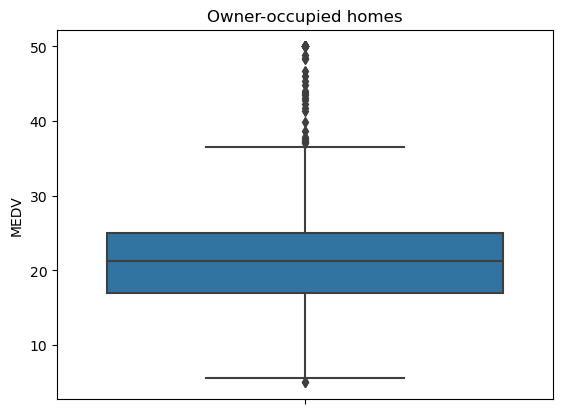

In [84]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')

## Provide a  bar plot for the Charles river variable

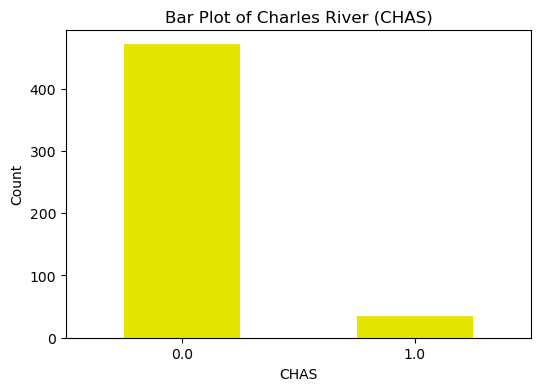

In [86]:

chas_counts = boston_df['CHAS'].value_counts()


plt.figure(figsize=(6, 4))
chas_counts.plot(kind='bar', color='#E5E500')
plt.title('Bar Plot of Charles River (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Provide a boxplot for the MEDV variable vs the AGE variable. (0-35, 35-70, 70+ years old)

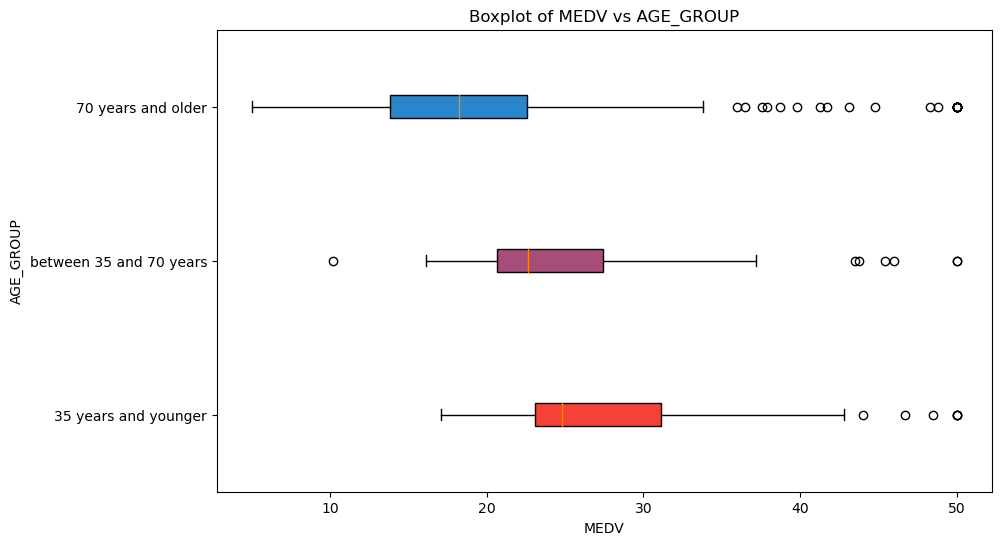

In [87]:
# Define the AGE groups using the loc function
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'AGE_GROUP'] = '70 years and older'

plt.figure(figsize=(10, 6))
plt.title('Boxplot of MEDV vs AGE_GROUP')
plt.xlabel('MEDV')
plt.ylabel('AGE_GROUP')

colors = ['#f44336', '#a64d79', '#2986cc']

for i, age_group in enumerate(age_labels):
    subset_df = boston_df[boston_df['AGE_GROUP'] == age_group]
    plt.boxplot(subset_df['MEDV'], vert=False, positions=[i], labels=[age_group], patch_artist=True, boxprops=dict(facecolor=colors[i]))

plt.yticks(range(len(age_labels)), age_labels)  # Set y-axis labels
plt.show()


## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

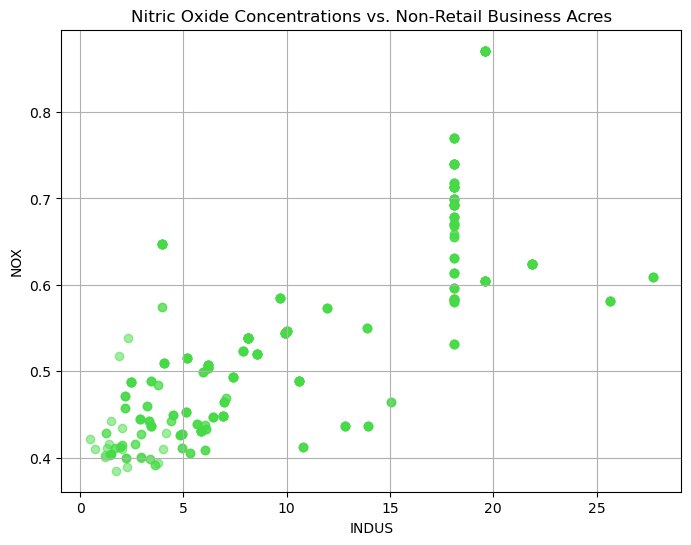

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5, color='#46db46')
plt.title('Nitric Oxide Concentrations vs. Non-Retail Business Acres')
plt.ylabel('NOX')
plt.xlabel('INDUS')
plt.grid(True)

plt.show()


## Create a histogram for the pupil to teacher ratio variable

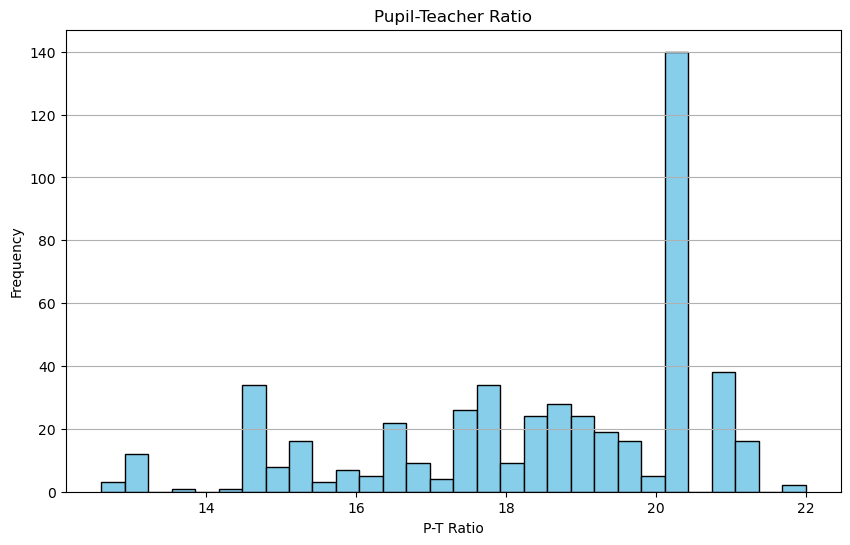

In [60]:
plt.figure(figsize=(10,6))
plt.hist(boston_df['PTRATIO'], bins=30, color='skyblue', edgecolor='black')
plt.title('Pupil-Teacher Ratio')
plt.xlabel('P-T Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

## Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [71]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [66]:
houses_bounded_by_CR = boston_df[boston_df['CHAS'] == 1]['MEDV']
houses_not_bounded_by_CR = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(houses_bounded_by_CR, houses_not_bounded_by_CR)

print("Test Statistic:", t_statistic)
print("p-value:", p_value)


Test Statistic: 3.996437466090509
p-value: 7.390623170519905e-05


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [74]:
import scipy.stats as stats

# Separate data into different groups based on AGE categories
age_categories = boston_df['AGE'].unique()
age_groups = [boston_df[boston_df['AGE'] == category]['MEDV'] for category in age_categories]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*age_groups)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 0.9840091646131573
p-value: 0.5539698276810093


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [79]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient (r):", correlation_coefficient)
print("p-value:", p_value)


Pearson Correlation Coefficient (r): 0.7636514469209149
p-value: 7.913361061240043e-98


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [80]:
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        13:21:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0